# Customer segmentation

## Required Packages

In [3]:
#import modules
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt

## Loading Dataset

In [4]:
Data = pd.read_csv("C:/Users/santh/Desktop/Project/Sales_Data1.csv")
Data.head()

,sl_no,Invoice,StockCode,Description,Quantity,InvoiceDate,Date,Time,Price,Customer ID,Country,Total_price,gender,Age
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12-01-2009 07:45,01-12-2009,07:45:00,6.95,13085,United Kingdom,83.4,male,22
1,1,489434,79323P,PINK CHERRY LIGHTS,12,12-01-2009 07:45,01-12-2009,07:45:00,6.75,13085,United Kingdom,81.0,male,22
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,12-01-2009 07:45,01-12-2009,07:45:00,6.75,13085,United Kingdom,81.0,male,22
3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12-01-2009 07:45,01-12-2009,07:45:00,2.10,13085,United Kingdom,100.8,male,22
4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12-01-2009 07:45,01-12-2009,07:45:00,1.25,13085,United Kingdom,30.0,male,22


In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824364 entries, 0 to 824363
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   sl_no        824364 non-null  int64  
 1   Invoice      824364 non-null  object 
 2   StockCode    824364 non-null  object 
 3   Description  824364 non-null  object 
 4   Quantity     824364 non-null  int64  
 5   InvoiceDate  824364 non-null  object 
 6   Date         824364 non-null  object 
 7   Time         824364 non-null  object 
 8   Price        824364 non-null  float64
 9   Customer ID  824364 non-null  int64  
 10  Country      824364 non-null  object 
 11  Total_price  824364 non-null  float64
 12  gender       824364 non-null  object 
 13  Age          824364 non-null  int64  
dtypes: float64(2), int64(4), object(8)
memory usage: 88.1+ MB


## Removing Duplicates

In [6]:
Data= Data[pd.notnull(Data['Customer ID'])]
filtered_data=Data[['Country','Customer ID']].drop_duplicates()

##  Data Insights

In [7]:
temp = Data[['Customer ID', 'Invoice', 'Country']].groupby(['Customer ID', 'Invoice', 'Country']).count()
temp = temp.reset_index(drop = False)
temp.head()

,Customer ID,Invoice,Country
0,12346,491725,United Kingdom
1,12346,491742,United Kingdom
2,12346,491744,United Kingdom
3,12346,492718,United Kingdom
4,12346,492722,United Kingdom


In [8]:
countries = temp['Country'].value_counts()
countries.head()

United Kingdom    40505
Germany            1095
France              738
EIRE                727
Netherlands         250
Name: Country, dtype: int64

In [9]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
data = dict(type='choropleth',
locations = countries.index,
locationmode = 'country names', z = countries,
text = countries.index, colorbar = {'title':'Order nb.'},
colorscale=[[0, 'rgb(224,255,255)'],
            [0.01, 'rgb(166,206,227)'], [0.02, 'rgb(31,120,180)'],
            [0.03, 'rgb(178,223,138)'], [0.05, 'rgb(51,160,44)'],
            [0.10, 'rgb(251,154,153)'], [0.20, 'rgb(255,255,0)'],
            [1, 'rgb(227,26,28)']],    
reversescale = False)
#_______________________
layout = dict(title='Number of orders per country',
geo = dict(showframe = True, projection={'type':'mercator'}))
#______________
choromap = go.Figure(data= [data], layout = layout)
iplot(choromap, validate=False)

<AxesSubplot:>

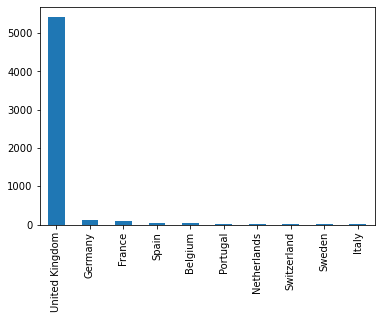

In [10]:
#Top ten country's customer
filtered_data.Country.value_counts()[:10].plot(kind='bar')

## Dataset Of UK

In [11]:
uk_data=Data[Data.Country=='United Kingdom']
uk_data.head()

,sl_no,Invoice,StockCode,Description,Quantity,InvoiceDate,Date,Time,Price,Customer ID,Country,Total_price,gender,Age
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12-01-2009 07:45,01-12-2009,07:45:00,6.95,13085,United Kingdom,83.4,male,22
1,1,489434,79323P,PINK CHERRY LIGHTS,12,12-01-2009 07:45,01-12-2009,07:45:00,6.75,13085,United Kingdom,81.0,male,22
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,12-01-2009 07:45,01-12-2009,07:45:00,6.75,13085,United Kingdom,81.0,male,22
3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12-01-2009 07:45,01-12-2009,07:45:00,2.10,13085,United Kingdom,100.8,male,22
4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12-01-2009 07:45,01-12-2009,07:45:00,1.25,13085,United Kingdom,30.0,male,22


In [12]:
uk_data.describe()

,sl_no,Quantity,Price,Customer ID,Total_price,Age
count,741301.000000,741301.000000,741301.000000,741301.000000,741301.00000,741301.000000
mean,410080.392384,12.254326,3.459329,15554.046300,21.09787,43.247331
std,238559.625953,190.286168,69.683407,1594.076188,323.11077,15.110592
min,0.000000,1.000000,0.000000,12346.000000,0.00000,18.000000
25%,203273.000000,2.000000,1.250000,14203.000000,4.20000,31.000000
50%,407950.000000,4.000000,1.950000,15551.000000,10.20000,43.000000
75%,616197.000000,12.000000,3.750000,16936.000000,17.70000,56.000000
max,824347.000000,80995.000000,38970.000000,18287.000000,168469.60000,70.000000


In [13]:
uk_data = uk_data[(uk_data['Quantity']>0)]
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 741301 entries, 0 to 824347
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   sl_no        741301 non-null  int64  
 1   Invoice      741301 non-null  object 
 2   StockCode    741301 non-null  object 
 3   Description  741301 non-null  object 
 4   Quantity     741301 non-null  int64  
 5   InvoiceDate  741301 non-null  object 
 6   Date         741301 non-null  object 
 7   Time         741301 non-null  object 
 8   Price        741301 non-null  float64
 9   Customer ID  741301 non-null  int64  
 10  Country      741301 non-null  object 
 11  Total_price  741301 non-null  float64
 12  gender       741301 non-null  object 
 13  Age          741301 non-null  int64  
dtypes: float64(2), int64(4), object(8)
memory usage: 84.8+ MB


## Filter required Columns

In [ ]:
uk_data=uk_data[['Customer ID','InvoiceDate','Invoice','Quantity','Price']]
uk_data['TotalPrice'] = uk_data['Quantity'] * uk_data['Price']

In [ ]:
uk_data['InvoiceDate'].min(),uk_data['InvoiceDate'].max()

In [ ]:
PRESENT = dt.datetime(2011,12,10)
uk_data['InvoiceDate'] = pd.to_datetime(uk_data['InvoiceDate'])

In [ ]:
uk_data.head()

## RMF Analysis

In [ ]:
rfm= uk_data.groupby('Customer ID').agg({'InvoiceDate': lambda date: (PRESENT - date.max()).days,
                                        'Invoice': lambda num: len(num),
                                        'TotalPrice': lambda price: price.sum()})

In [ ]:
rfm.columns

In [ ]:
#Change the name of columns
rfm.columns=['monetary','frequency','recency']

In [ ]:
rfm['recency'] = rfm['recency'].astype(int)

In [ ]:
rfm.head()

## Computing Quantile of RFM values

In [ ]:
rfm['r_quartile'] = pd.qcut(rfm['recency'], 4, ['1','2','3','4'])
rfm['f_quartile'] = pd.qcut(rfm['frequency'], 4, ['4','3','2','1'])
rfm['m_quartile'] = pd.qcut(rfm['monetary'], 4, ['4','3','2','1'])

In [ ]:
rfm.head()

## RFM Result Interpretation

In [ ]:
rfm['RFM_Score'] = rfm.r_quartile.astype(str)+ rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
rfm.head()

In [ ]:
rfm[rfm['RFM_Score']=='121'].sort_values('monetary', ascending=False).head()